# Medical Cost Personal Insurance Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading the data file
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#checking the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can observe that there are no null values present in the dataset.

In [4]:
#checking the data types
data.dtypes 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#checking the categoriacal data
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

float64 : bmi, charges
int64 : age, children
object : sex(m or f), smoker(y or n), region(sw, nw, ne, s)
Hence we need to treat categorical data from the dataset

In [10]:
#Total no. of unique values in the target variable 
data['charges'].nunique()

1337

In [11]:
#we will look at the effects of variables on target variables
data[["sex","charges"]].groupby(["sex"], as_index = False).mean().sort_values(by = "charges",ascending = False)

,sex,charges
1,male,13956.751178
0,female,12569.578844


From the above analysis we can say that men pay more than women although theres not much difference

In [12]:
data[["children","charges"]].groupby(["children"], as_index = False).mean().sort_values(by = "charges",ascending = False)

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


We can see that those with 5 children pay less charges

In [13]:
data[["smoker",'charges']].groupby(["smoker"],as_index = False).mean().sort_values(by = 'charges',ascending = False)

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


We can see that smokers pay more than non-smokers

In [14]:
data[["region","charges"]].groupby(['region'],as_index = False).mean().sort_values(by = 'charges',ascending = False)

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


We can see the fees paid by the regions in which southeast and northeast people pays more

In [16]:
#now we will look at the variables on other variables
#region on other variables
import warnings
warnings.filterwarnings('ignore')

sex = data.groupby("sex", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False)
sex

,sex,age,bmi,children,charges
0,female,39.503021,30.377749,1.074018,12569.578844
1,male,38.917160,30.943129,1.115385,13956.751178


In [17]:
smoker = data.groupby("smoker", as_index=False)['age','bmi','children','charges'].mean().sort_values('age',ascending=False)
smoker

,smoker,age,bmi,children,charges
0,no,39.385338,30.651795,1.090226,8434.268298
1,yes,38.514599,30.708449,1.113139,32050.231832


In [18]:
children = data.groupby("children", as_index=False)['age','bmi','charges'].mean().sort_values('age',ascending=False)
children

,children,age,bmi,charges
3,3,41.566879,30.684331,15355.318367
1,1,39.453704,30.623148,12731.171832
2,2,39.445833,30.978104,15073.563734
4,4,39.000000,31.391200,13850.656311
0,0,38.444251,30.550296,12365.975602
5,5,35.611111,29.605000,8786.035247


In [20]:
region = data.groupby("region", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False)
region

,region,age,bmi,children,charges
3,southwest,39.455385,30.596615,1.141538,12346.937377
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.196923,29.199785,1.147692,12417.575374
2,southeast,38.939560,33.355989,1.049451,14735.411438


## Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

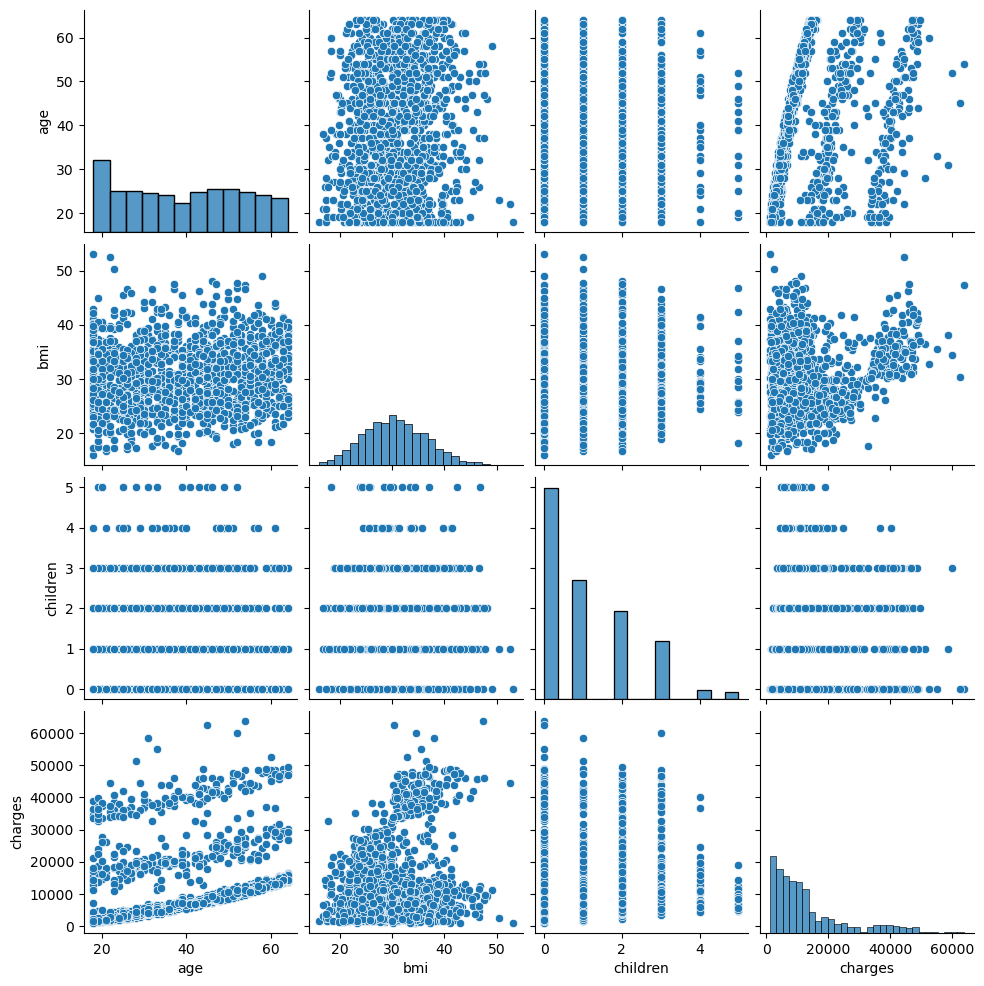

In [22]:
#lets have a quik overview using pairplot
sns.pairplot(data)
plt.show()

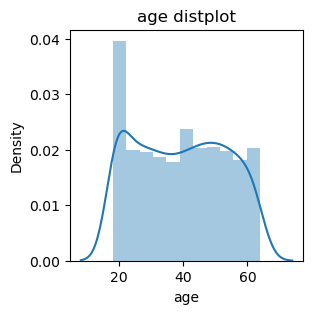

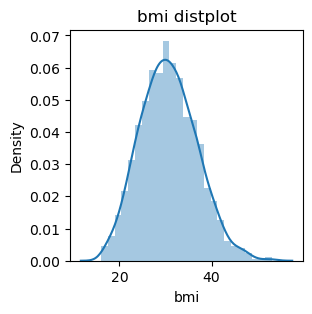

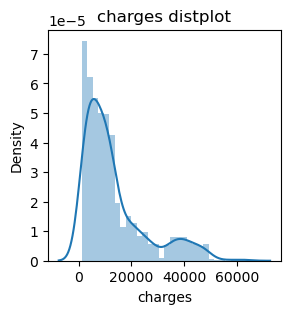

In [25]:
#checking features distribution for numerical features
numerical_features = ['age', 'bmi', 'charges']
for n in numerical_features :
    plt.figure(figsize =(3,3))
    sns.distplot(data[n])
    plt.title(f"{n} distplot")
    plt.show()

1 - We can see that the majority of the age group in in 20 and then 40-50 and we alos see the max age is 60-65
2 - We can see that the BMI is evenly distributed
3 - We can see that the most of the charges lies in range 0 to 5000 and the second highest chunk lies between 5000 to 10000, and also right skewed.

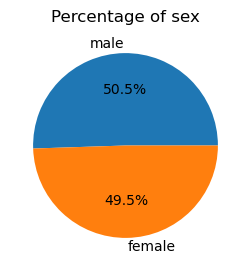

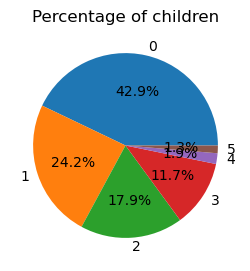

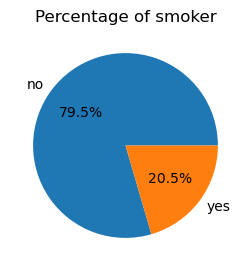

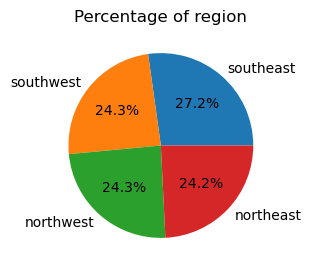

In [29]:
#checking features distribution for categorical features
categorical_features = ['sex','children', 'smoker', 'region']
for cf in categorical_features :
    s = data[cf].value_counts()
    plt.figure(figsize=(3,3))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'Percentage of {cf}')
    plt.show()

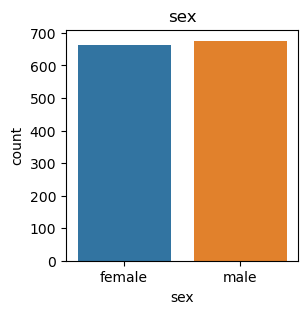

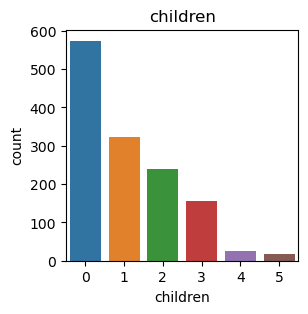

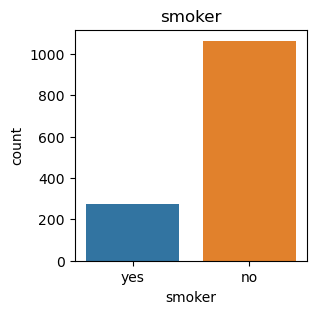

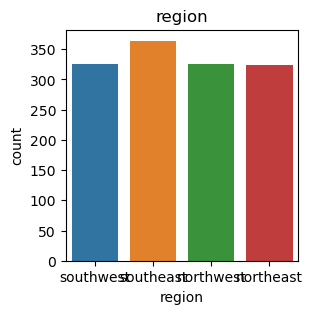

In [31]:
for cf in categorical_features :
    plt.figure(figsize =(3,3))
    sns.countplot(data=data, x = data[cf])
    plt.title(f"{cf}")
    plt.show()

1 - From the above observations we can see that the male and females are almost same and balanced
2 - We see that most of them have 0 children and then 1 is 2nd highest and the max they have is 5
3 - we can see that the total no of non-smoker is higher than the smoker, which is highly one-sided
4 - From the above observations we can see southeast is slightly higher than the other regions

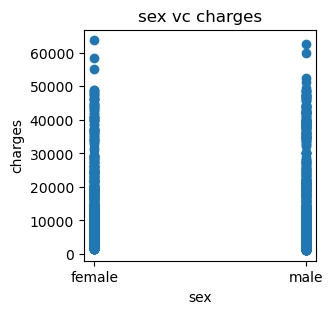

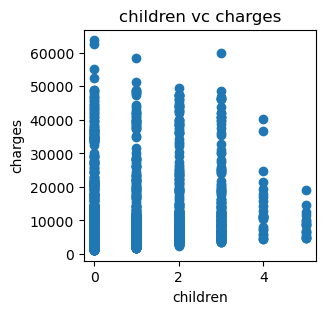

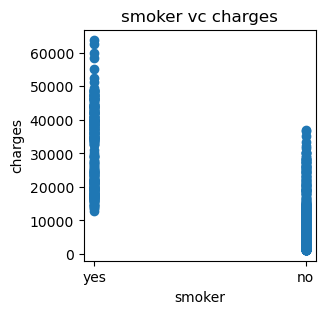

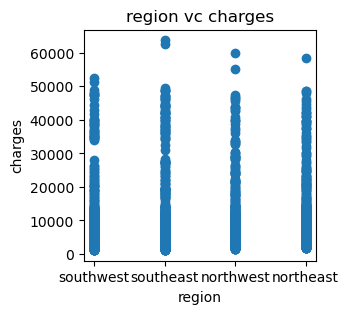

In [33]:
for cf in categorical_features :
    plt.figure(figsize =(3,3))
    plt.scatter(data[cf], data["charges"])
    plt.title(f"{cf} vc charges")
    plt.xlabel(f"{cf}")
    plt.ylabel("charges")
    plt.show()

1 - In column 'sex', the number of male clients are more than female clients
2 - In column 'children', most people do not have child, the charges which families with  5 children got is less than 30000
3 - In column 'smoker', most people are not smokers and only less than 300 of all are smokers
4 - In column 'region', northwest and northeast has the same percentage and southeast has the highest

## Categorical Features Encoding

Now we will convert the categorical features to numbers because the dataset has a lot of string values 
We will use encoding techniques to convert the string data to numerical data

In [34]:
data["sex"] = [0 if i == "female" else 1 for i in data["sex"]]
data["sex"] = data["sex"].astype("category")
data = pd.get_dummies(data, columns= ["sex"])
data.head()

,age,bmi,children,smoker,region,charges,sex_0,sex_1
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


We changed female to 0 and male to 1 so that our model can understand

In [36]:
data["children"] = data["children"].astype("category")
data = pd.get_dummies(data, columns= ["children"])
data.head()

,age,bmi,smoker,region,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,yes,southwest,16884.92400,1,0,1,0,0,0,0,0
1,18,33.770,no,southeast,1725.55230,0,1,0,1,0,0,0,0
2,28,33.000,no,southeast,4449.46200,0,1,0,0,0,1,0,0
3,33,22.705,no,northwest,21984.47061,0,1,1,0,0,0,0,0
4,32,28.880,no,northwest,3866.85520,0,1,1,0,0,0,0,0


In [37]:
data["smoker"] = [0 if i == "no" else 1 for i in data["smoker"]]
data["smoker"] = data["smoker"].astype("category")
data = pd.get_dummies(data, columns= ["smoker"])
data.head()

,age,bmi,region,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1
0,19,27.900,southwest,16884.92400,1,0,1,0,0,0,0,0,0,1
1,18,33.770,southeast,1725.55230,0,1,0,1,0,0,0,0,1,0
2,28,33.000,southeast,4449.46200,0,1,0,0,0,1,0,0,1,0
3,33,22.705,northwest,21984.47061,0,1,1,0,0,0,0,0,1,0
4,32,28.880,northwest,3866.85520,0,1,1,0,0,0,0,0,1,0


We changed the non smokers to 0 and smokers to 1

In [38]:
data["region"] = [0 if i == "southeast" else 1 if i == "southwest" else 2 if i == "northwest" else 3 for i in data["region"]]
data["region"] = data["region"].astype("category")
data = pd.get_dummies(data, columns= ["region"])
data.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,0,1,0


southeast - 0, southwest - 1, northwest - 2, northeast - 3

Heatmap of Correlation of the columns within the Columns of Features and Target

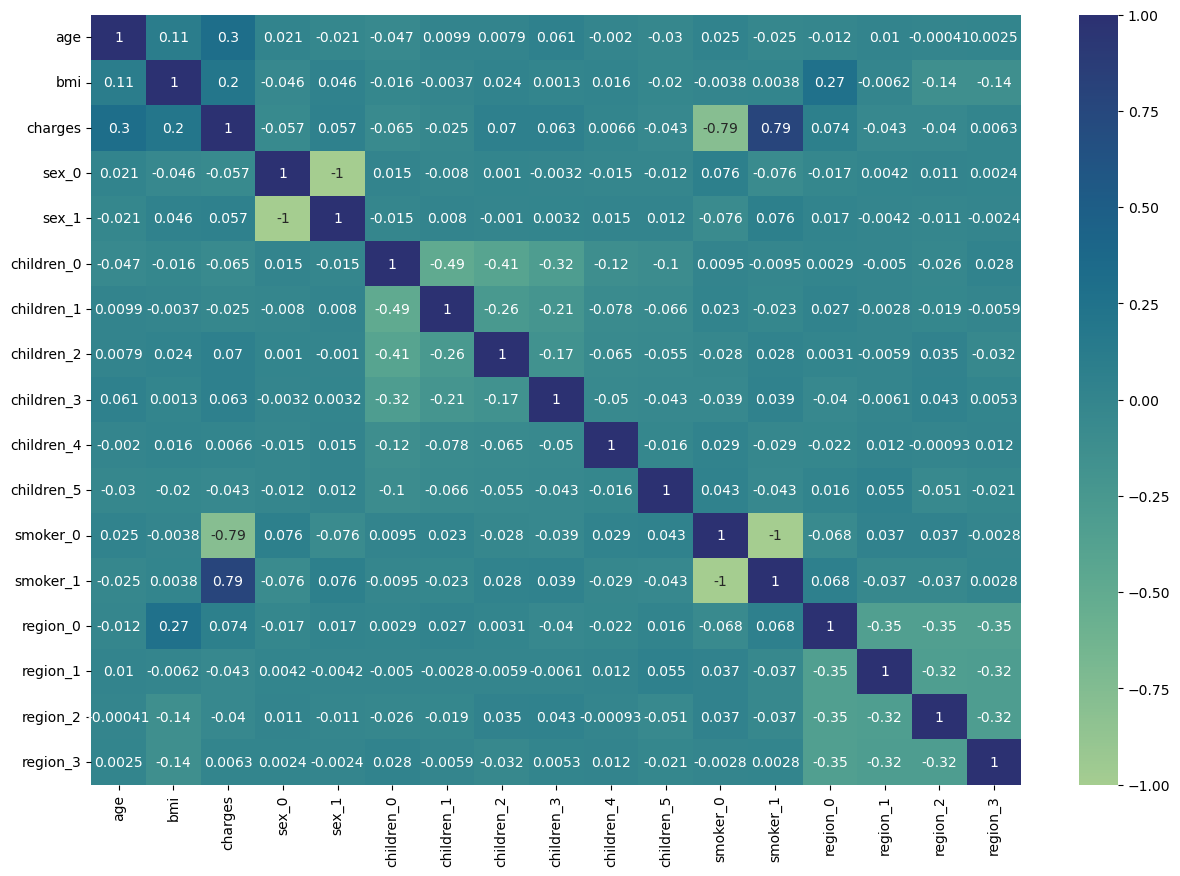

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="crest")
plt.show()

We notice that the smoker columns has the highest relation with target variable

There was skewness found when analyzing the charges in the charts above, so we will take care of it now

In [42]:
from scipy.stats import norm
(mean, sd) = norm.fit(data["charges"])
print("mean {} : {}, sd {} : {}".format("charges", mean, "charges", sd))

mean charges : 13270.422265141257, sd charges : 12105.484975561612


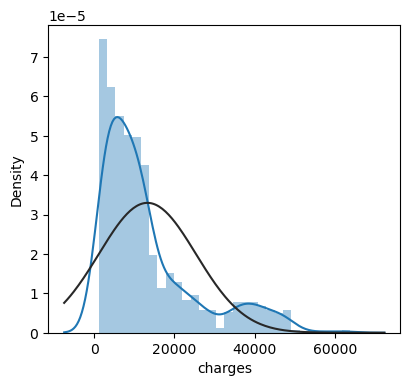

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"], fit=norm)
plt.show()

In [45]:
data["charges"] = np.log1p(data["charges"])

In [46]:
(mean, sd) = norm.fit(data["charges"])
print("mean {} : {}, sd {} : {}".format("charges", mean, "charges", sd))

mean charges : 9.098827980629359, sd charges : 0.9190355163595243


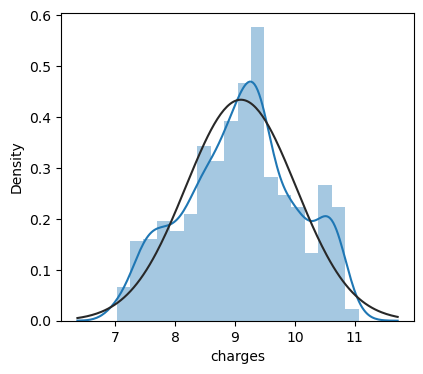

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"], fit=norm)
plt.show()

As we can see the skewness is removed, now we are ready to move forward for modeling part

## Modeling

In [48]:
#importing libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
X = data.drop(["charges"], axis = 1)
y = data.charges

In [50]:
X

,age,bmi,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,18,33.770,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,28,33.000,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,33,22.705,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,32,28.880,0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1334,18,31.920,1,0,1,0,0,0,0,0,1,0,0,0,0,1
1335,18,36.850,1,0,1,0,0,0,0,0,1,0,1,0,0,0
1336,21,25.800,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [51]:
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64

In [52]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [53]:
#standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [54]:
#defined a list in which we will save the model results 
results = []

## Linear Regression Model

In [55]:
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)
score = r2_score(Y_test,predict)
results.append(score)

In [56]:
print("r square score -",score)
print('Mean Absolute Error -', metrics.mean_absolute_error(Y_test, predict))
print('Mean Squared Error -', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error -', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

r square score - 0.8067612933489876
Mean Absolute Error - 0.281515779461691
Mean Squared Error - 0.16966843344671262
Root Mean Squared Error - 0.41190828280906494


In [57]:
data_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
data_linearRegression.head()

,Actual,Predicted
698,9.303580,9.249409
520,10.152594,9.099071
1144,9.172784,9.257427
908,9.627146,9.764188
559,7.406972,8.011209


Cross Validation

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(multiple_linear, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.75415734 0.73926183 0.79790504]
mean of all scores is :  0.7637747346555424


## Random Forest Regression

In [59]:
#defining the parameters for random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_predict = rf_random.predict(X_test)
score_rf = r2_score(Y_test,rf_predict)
results.append(score_rf)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [61]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, rf_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, rf_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, rf_predict)))

r_square score -->  0.8820315688489342
Mean Absolute Error --> 0.17536708872832113
Mean Squared Error --> 0.10357924277414872
Root Mean Squared Error --> 0.32183729239189907


In [63]:
df_RandomForestRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_predict})
df_RandomForestRegressor.head()

,Actual,Predicted
698,9.303580,9.371907
520,10.152594,9.192744
1144,9.172784,9.304536
908,9.627146,9.777138
559,7.406972,7.512730


In [64]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(rf, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.81333321 0.79311983 0.80334429]
mean of all scores is :  0.8032657774480675


## XGB Regressor

In [65]:
xgb =  XGBRegressor(max_depth = 2, learning_rate = .2)
xgb.fit(X_train,Y_train)
xgb_predict = xgb.predict(X_test)
score_xgb = r2_score(Y_test,xgb_predict)
results.append(score_xgb)

In [66]:
print("r_square score --> ",score_xgb)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, xgb_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, xgb_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, xgb_predict)))

r_square score -->  0.8772112185046235
Mean Absolute Error --> 0.19554806634913557
Mean Squared Error --> 0.10781163133520744
Root Mean Squared Error --> 0.3283468156312886


In [67]:
df_XGBRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': xgb_predict})
df_XGBRegressor.head()

,Actual,Predicted
698,9.303580,9.364185
520,10.152594,9.221601
1144,9.172784,9.250745
908,9.627146,9.557039
559,7.406972,7.733916


In [68]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(xgb, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.83463151 0.82732229 0.8262615 ]
mean of all scores is :  0.8294050992135276


KNN Regressor

In [69]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
score_knn = r2_score(Y_test,knn_predict)
results.append(score_knn)

In [70]:
print("r_square score --> ",score_knn)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, knn_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, knn_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, knn_predict)))

r_square score -->  0.8050232702613416
Mean Absolute Error --> 0.28213911950675813
Mean Squared Error --> 0.1711944613304931
Root Mean Squared Error --> 0.4137565242150184


In [71]:
df_KNNRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': knn_predict})
df_KNNRegressor.head()

,Actual,Predicted
698,9.303580,9.255778
520,10.152594,9.466880
1144,9.172784,8.919416
908,9.627146,9.407459
559,7.406972,8.093638


In [72]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(knn, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.36895131 0.40807818 0.46308998]
mean of all scores is :  0.41337315789112267


Ridge Regression

In [73]:
ridge = Ridge()
ridge.fit(X_train,Y_train)
ridge_predict = ridge.predict(X_test)
score_ridge = r2_score(Y_test,ridge_predict)
results.append(score_ridge)

In [74]:
print("r_square score --> ",score_ridge)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, ridge_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, ridge_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, ridge_predict)))

r_square score -->  0.8067247373141597
Mean Absolute Error --> 0.28159948973874394
Mean Squared Error --> 0.16970053056260498
Root Mean Squared Error --> 0.4119472424505412


In [75]:
df_RidgeRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': ridge_predict})
df_RidgeRegressor.head()

,Actual,Predicted
698,9.303580,9.249016
520,10.152594,9.098802
1144,9.172784,9.257232
908,9.627146,9.763551
559,7.406972,8.012074


In [76]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(ridge, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.74434938 0.75413772 0.79274835]
mean of all scores is :  0.7637451534553615


Gradient Boosting Regressor

In [77]:
gbr = GradientBoostingRegressor(max_depth=3, random_state=42)
gbr.fit(X_train, Y_train)
gbr_predict = gbr.predict(X_test)
score_gbr = r2_score(Y_test,gbr_predict)
results.append(score_gbr)

In [78]:
print("r_square score --> ",score_gbr)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, gbr_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, gbr_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, gbr_predict)))

r_square score -->  0.8830588560340465
Mean Absolute Error --> 0.17609023876277044
Mean Squared Error --> 0.10267725884753985
Root Mean Squared Error --> 0.32043292410041113


In [79]:
df_GBRRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': gbr_predict})
df_GBRRegressor.head()

,Actual,Predicted
698,9.303580,9.364587
520,10.152594,9.200513
1144,9.172784,9.253919
908,9.627146,9.630385
559,7.406972,7.537730


In [80]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(gbr, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.81082498 0.84808186 0.8322526 ]
mean of all scores is :  0.8303864786420233


## Model Results

In [81]:
df_result = pd.DataFrame({"Score":results, "ML Models":["LinearRegression","RandomForestRegression",
             "XGBRegression","KNN Regression","RidgeRegression","Gradient Boosting Regression"]})

In [82]:
df_result

,Score,ML Models
0,0.806761,LinearRegression
1,0.882032,RandomForestRegression
2,0.877211,XGBRegression
3,0.805023,KNN Regression
4,0.806725,RidgeRegression
5,0.883059,Gradient Boosting Regression


So from the results we can choose Gradient Boosting Regression the best model for this dataset

In [86]:
#Save the model
import pickle
final_model=GradientBoostingRegressor()
final_model.fit(X_train,Y_train)
filename = 'Medical Insurance.pkl'
pickle.dump(final_model,open(filename,'wb'))